AMV Historical Data

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [2]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [4]:
# 3. Split train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [7]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [8]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [10]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [11]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.07681241]
Predicted closing prices for the next 60 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.

In [12]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 7787.570020004504
MAPE: 49.66671085874364
MSLE: 0.19633696816104573


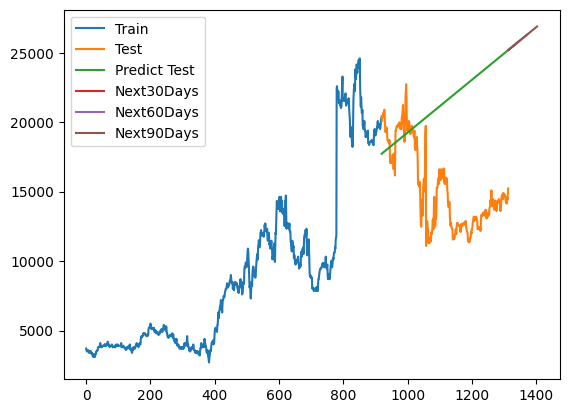

In [13]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DHT Historical Data

In [14]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [15]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [16]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [17]:
# 3. Split train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [18]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [20]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [21]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [22]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [23]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.07681241]
Predicted closing prices for the next 60 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.

In [24]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 7787.570020004504
MAPE: 49.66671085874364
MSLE: 0.19633696816104573


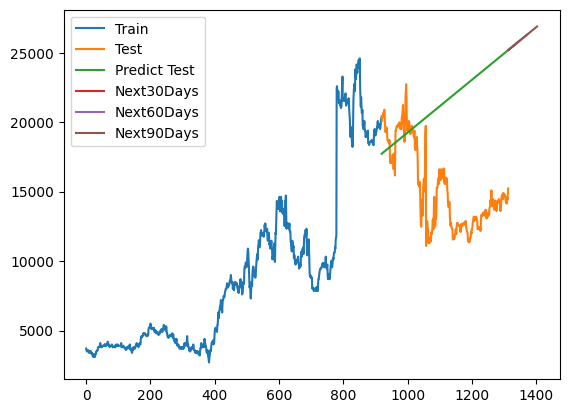

In [25]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()

DP3 Historical Data

In [26]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [27]:
# 2. Load data
df = pd.read_csv('AMV Historical Data.csv')
df = df['Price'].str.replace(',', '').astype(float)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [28]:
df

0        3700.0
1        3600.0
2        3500.0
3        3500.0
4        3500.0
         ...   
1308    14144.0
1309    14594.0
1310    14414.0
1311    14865.0
1312    15225.0
Name: Price, Length: 1313, dtype: float64

In [29]:
# 3. Split train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [30]:
# 4. Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# 5. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [32]:
# 6. Create index predicts the next 30, 60, 90 days
last_index = df.index[-1]

In [33]:
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [34]:
# 7. Predictions for the next 30, 60 and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

In [35]:
# 8. Price predictions for the next 30, 60 and 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.07681241]
Predicted closing prices for the next 60 days:
[25204.91447371 25223.88558883 25242.85670396 25261.82781909
 25280.79893422 25299.77004935 25318.74116447 25337.7122796
 25356.68339473 25375.65450986 25394.62562498 25413.59674011
 25432.56785524 25451.53897037 25470.5100855  25489.48120062
 25508.45231575 25527.42343088 25546.39454601 25565.36566114
 25584.33677626 25603.30789139 25622.27900652 25641.25012165
 25660.22123677 25679.1923519  25698.16346703 25717.13458216
 25736.10569729 25755.

In [36]:
# 9. Evaluation
# RMSE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# MSLE
msle = mean_squared_log_error(y_test, y_pred)
print('MSLE:', msle)

RMSE: 7787.570020004504
MAPE: 49.66671085874364
MSLE: 0.19633696816104573


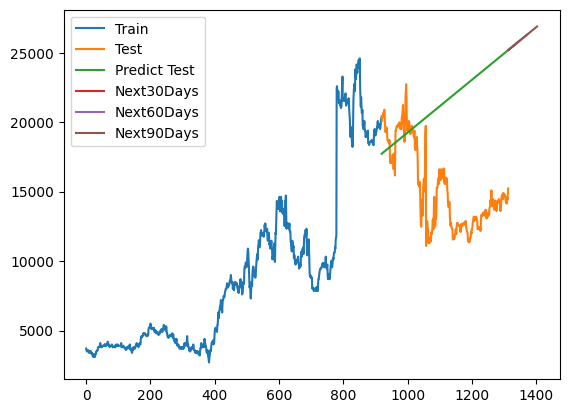

In [37]:
# 10. Plotting
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, y_pred, label='Predict Test')
plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next30Days')
plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next60Days')
plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next90Days')
plt.legend()
plt.show()